# Interpolation of Cloud Atmosphere using scipy.interpolate.griddata

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from scipy.interpolate import griddata
sns.set_style("whitegrid")
# plt.style.use('classic')
# plt.style.use('seaborn-whitegrid')

## Creating a interpolation graph for cloud in atmosphere

> Using a cloud in an atmosphere

In [21]:
# "../create_atm/atmospheres/cloud_atm_1-2.csv"
# "../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.csv"
df_cloud = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.csv", header = None, index_col = 0) 
N_cloud = int(df_cloud.shape[1]/2)

In [22]:
dft_cloud = df_cloud.T

In [23]:
effr_cloud = [4,8,10,16,20,32] 

In [24]:
dTau_range_cloud = []

for col in dft_cloud.columns:
    dTau_range_cloud.append(col)

N_dTau_cloud = len(dTau_range_cloud)

# print(dTau_range_cloud)

In [25]:
df_index_log = np.log(df_cloud.index)
# df_index_log

## Interpolating using griddata routine

### Effective Radius interpolation

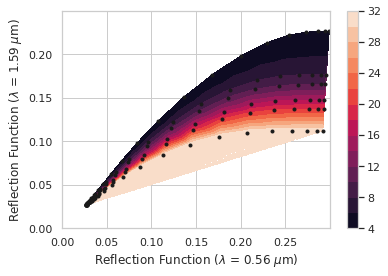

In [26]:
dft_numpy = dft_cloud.to_numpy()

x_effr = dft_numpy[0]
for i in range(N_cloud-1):
    x_effr = np.concatenate([x_effr, dft_numpy[i+1]])

y_effr = dft_numpy[N_cloud]
for i in range(N_cloud-1):
    y_effr = np.concatenate([y_effr, dft_numpy[i+1+N_cloud]])

z_effr = np.concatenate([np.ones(N_dTau_cloud)*4, np.ones(N_dTau_cloud)*8, np.ones(N_dTau_cloud)*10, np.ones(N_dTau_cloud)*16, np.ones(N_dTau_cloud)*20, np.ones(N_dTau_cloud)*32])
z_effr = np.log10(z_effr)

xi_effr = np.arange(0,0.3,0.0001)
yi_effr = np.arange(0,0.25,0.0001)
xi_effr,yi_effr = np.meshgrid(xi_effr,yi_effr)

zi_effr = griddata((x_effr,y_effr),z_effr,(xi_effr,yi_effr),method='linear')

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x_effr,y_effr,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
cntr1 = ax.contourf(xi_effr, yi_effr, 10**zi_effr, levels=14)

plt.colorbar(cntr1)
plt.show()

## Optical Depth Interpolation

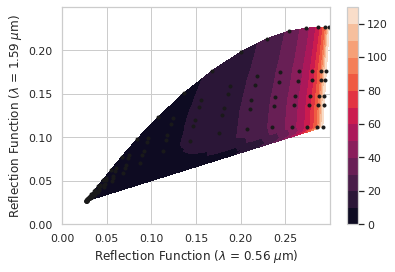

In [27]:
df_numpy = df_cloud.to_numpy()

x_opd = df_numpy[0][0:N_cloud]
for i in range(N_dTau_cloud-1):
    x_opd = np.concatenate([x_opd, df_numpy[i+1][0:N_cloud]])

y_opd = df_numpy[0][N_cloud:2*N_cloud]
for i in range(N_dTau_cloud-1):
    y_opd = np.concatenate([y_opd, df_numpy[i+1][N_cloud:2*N_cloud]])

z_opd = np.ones(N_cloud)*df_cloud.index[0]
for i in range(N_dTau_cloud-1):
    z_opd = np.concatenate([z_opd, np.ones(N_cloud)*df_cloud.index[i+1]])

z_opd = np.log10(z_opd)

xi_opd = np.arange(0,0.3,0.0001)
yi_opd = np.arange(0,0.25,0.0001)
xi_opd,yi_opd = np.meshgrid(xi_opd,yi_opd)

zi_opd = griddata((x_opd,y_opd),z_opd,(xi_opd,yi_opd),method='linear')

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.contourf(xi,yi,zi) # np.arange(0.18,0.2,0.001)
plt.plot(x_opd,y_opd,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
cntr1 = ax.contourf(xi_opd, yi_opd, 10**zi_opd, levels=14)

plt.colorbar(cntr1)
plt.show()

# Investigating Aerosol Above Cloud

In [28]:
# "../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.1.csv"
# "../create_atm/atmospheres/aerosol_cloud_atm_0_0.01.csv"
# df_cloud_0 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.1.csv", header = None, index_col = 0)

In [29]:
# df_70 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a70_0_0.1.csv", header = None, index_col = 0)
# df_76 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a76_0_0.1.csv", header = None, index_col = 0)
# df_77 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a77_0_0.1.csv", header = None, index_col = 0)
# df_79 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.1.csv", header = None, index_col = 0)

> smoke aerosol

In [30]:
df_79_0p02 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.02.csv", header = None, index_col = 0)
df_79_0p04 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.04.csv", header = None, index_col = 0)
df_79_0p06 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.06.csv", header = None, index_col = 0)
df_79_0p08 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.08.csv", header = None, index_col = 0)
df_79_0p10 = pd.read_csv("../create_atm/atmospheres/aerosol_cloud_atm_a79_0_0.1.csv", header = None, index_col = 0)

In [31]:
## averaged noise in 0.55 micron channel is 2.4%
## averaged noise in 1.6 micron channel is 3.2%

noise_v = 0.024
noise_ir = 0.032

# x_err_70 = dft_70_numpy[1]* noise_v
# y_err_70 = dft_70_numpy[1+N_cloud]* noise_ir

x_err_cloud = dft_numpy[1] * noise_v
y_err_cloud = dft_numpy[1+N_cloud] * noise_ir

In [32]:
# plt.plot(df_70[2+1], df_70[2+1+N_cloud])
# plt.plot(df_76[2+1], df_76[2+1+N_cloud])
# plt.plot(df_77[2+1], df_77[2+1+N_cloud])
# plt.plot(df_79[2+1], df_79[2+1+N_cloud])


# plt.legend(['Dust (a70)','Clean Maritime (a76)','Dirty Maritime (a77)','Smoke (a79)'], title='aerosol ($\mu$m)')

# for i in range(N_cloud):
#     if i == 2:
#         plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=2, capthick=1, ecolor='black') # , linestyle = 'dashed'
#     else:
#         plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], 'k', linestyle = 'dashed')
    
# #plt.legend(effr_cloud, title='effective radius ($\mu$m)')
# plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
# plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
# plt.show()

In [33]:
dTau_range_cloud = []

for col in dft_cloud.columns:
    dTau_range_cloud.append(col)

print(dTau_range_cloud)

[0.125, 0.1767766952966369, 0.25, 0.3535533905932738, 0.5, 0.7071067811865476, 1.0, 1.4142135623730951, 2.0, 2.8284271247461903, 4.0, 5.656854249492381, 8.0, 11.31370849898476, 16.0, 22.62741699796952, 32.0, 45.254833995939045, 64.0, 90.50966799187808, 128.0]


In [34]:
effr_aerosol = [0.02,0.04,0.06,0.08,0.1]

(0.022, 0.24)

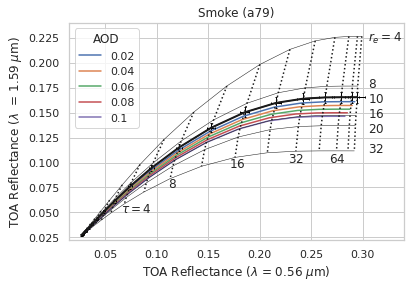

In [35]:
# plot perturbations
plt.plot(df_79_0p02[2+1], df_79_0p02[2+1+N_cloud])
plt.plot(df_79_0p04[2+1], df_79_0p04[2+1+N_cloud])
plt.plot(df_79_0p06[2+1], df_79_0p06[2+1+N_cloud])
plt.plot(df_79_0p08[2+1], df_79_0p08[2+1+N_cloud])
plt.plot(df_79_0p10[2+1], df_79_0p10[2+1+N_cloud])


# plot grid
## effective radius
N_dTau_cloud = len(dTau_range_cloud)

# fig, ax = plt.subplots()

for i in range(N_cloud):
    if i == 2:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 2)
        plt.errorbar(df_cloud[i+1], df_cloud[i+1+N_cloud], yerr=y_err_cloud, xerr = x_err_cloud,color='k', capsize=1, capthick=1, ecolor='black', linewidth = 1)
    else:
        plt.plot(df_cloud[i+1], df_cloud[i+1+N_cloud], color = 'k', linewidth = 0.5)
# plt.plot(df_cloud_atm[5], df_cloud_atm[11])
# plt.plot(df_cloud_atm[6], df_cloud_atm[12])

#plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
plt.xlabel('TOA Reflectance ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('TOA Reflectance ($\lambda$  = 1.59 $\mu$m)')

## optical depth
for i in range(N_dTau_cloud):
    x = dft_cloud[dTau_range_cloud[i]][:N_cloud]
    y = dft_cloud[dTau_range_cloud[i]][N_cloud:2*N_cloud]
    
    plt.plot(x,y, color = 'k',linestyle =':', linewidth = 1.5)


# plot details
plt.title("Smoke (a79)")
plt.legend(effr_aerosol, title='AOD')
# effective radii
plt.text(0.305, 0.221, '$r_{e}=4$')
plt.text(0.305, 0.175, '$8$')
plt.text(0.305, 0.16, '$10$')
plt.text(0.305, 0.145, '$16$')
plt.text(0.305, 0.13, '$20$')
plt.text(0.305, 0.11, '$32$')

# effective radii
plt.text(0.065, 0.05, r'$\tau = 4$')
plt.text(0.111, 0.075, '$8$')
plt.text(0.17, 0.095, '$16$')
plt.text(0.228, 0.1, '$32$')
plt.text(0.267, 0.1, '$64$')

# plot regions
plt.xlim(0.015,0.34)
plt.ylim(0.022,0.24)

In [42]:
df_79_0p02[2+1]

0
0.125000      0.027279
0.176777      0.027899
0.250000      0.028763
0.353553      0.029986
0.500000      0.031706
0.707107      0.034122
1.000000      0.037523
1.414214      0.042351
2.000000      0.049297
2.828427      0.059395
4.000000      0.074059
5.656854      0.094548
8.000000      0.121088
11.313708     0.151966
16.000000     0.184073
22.627417     0.214337
32.000000     0.240602
45.254834     0.261665
64.000000     0.277072
90.509668     0.287015
128.000000    0.292331
Name: 3, dtype: float64

In [48]:
N_dTau_cloud

21

In [49]:
i = 20

print(df_79_0p02[2+1][dTau_range_cloud[i]])
print(df_79_0p02[2+1+N_cloud][dTau_range_cloud[i]])

0.29233137
0.16098301


In [39]:
10**griddata((x_effr,y_effr),z_effr,(0.2,0.15),method='linear')

11.63685012711452

In [56]:
COD_retrieved_0p02 =[]
COD_retrieved_0p04 =[]
COD_retrieved_0p06 =[]
COD_retrieved_0p08 =[]
COD_retrieved_0p10 =[]

for i in range(N_dTau_cloud):
    COD_retrieved_0p02.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p02[2+1][dTau_range_cloud[i]],df_79_0p02[2+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p04.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p04[2+1][dTau_range_cloud[i]],df_79_0p04[2+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p06.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p06[2+1][dTau_range_cloud[i]],df_79_0p06[2+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p08.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p08[2+1][dTau_range_cloud[i]],df_79_0p08[2+1+N_cloud][dTau_range_cloud[i]]),method='linear'))
    COD_retrieved_0p10.append(10**griddata((x_effr,y_effr),z_effr,(df_79_0p10[2+1][dTau_range_cloud[i]],df_79_0p10[2+1+N_cloud][dTau_range_cloud[i]]),method='linear'))

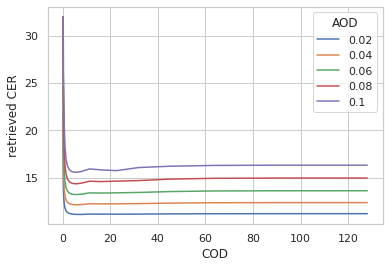

In [60]:
plt.plot(dTau_range_cloud, COD_retrieved_0p02)
plt.plot(dTau_range_cloud, COD_retrieved_0p04)
plt.plot(dTau_range_cloud, COD_retrieved_0p06)
plt.plot(dTau_range_cloud, COD_retrieved_0p08)
plt.plot(dTau_range_cloud, COD_retrieved_0p10)

plt.xlabel('COD')
plt.ylabel('retrieved CER')
plt.legend(effr_aerosol, title='AOD')